In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
exec(open('/Users/jamesblanton/congress-legislators/script.py').read())

In [3]:
df

,birth_date,full_name,terms,type,party,yrs,age,year
0,1745-04-02,Richard Bassett,"(1789-03-04, 1793-03-03, sen, Anti-Administrat...",sen,Anti-Administration,1789-03-04,16042 days,1789
1,1745-04-02,Richard Bassett,"(1789-03-04, 1793-03-03, sen, Anti-Administrat...",sen,Anti-Administration,1790-03-04,16407 days,1790
2,1745-04-02,Richard Bassett,"(1789-03-04, 1793-03-03, sen, Anti-Administrat...",sen,Anti-Administration,1791-03-04,16772 days,1791
3,1745-04-02,Richard Bassett,"(1789-03-04, 1793-03-03, sen, Anti-Administrat...",sen,Anti-Administration,1792-03-04,17138 days,1792
4,1742-03-21,Theodorick Bland,"(1789-03-04, 1791-03-03, rep, None)",rep,None,1789-03-04,17150 days,1789
...,...,...,...,...,...,...,...,...
99221,1948-10-24,Kweisi Mfume,"(1995-01-04, 1996-02-18, rep, Democrat)",rep,Democrat,1996-01-04,17238 days,1996
99222,1948-10-24,Kweisi Mfume,"(2020-05-05, 2021-01-03, rep, Democrat)",rep,Democrat,2020-05-05,26126 days,2020
99223,1957-12-30,Thomas P. Tiffany,"(2020-05-19, 2021-01-03, rep, Republican)",rep,Republican,2020-05-19,22786 days,2020
99224,1976-04-24,Mike Garcia,"(2020-05-19, 2021-01-03, rep, Republican)",rep,Republican,2020-05-19,16096 days,2020


In [9]:
df['year'] = df['yrs'].dt.year
df['age_days'] = df['age'].dt.days
df = df[df['year'] < 2021]
df_certain = df[df['age_days'] > 0]
df_dropped = df[df['age_days'] < 0]
grouped = df_certain.groupby('year')
mean_yr = grouped.agg({'age_days':'mean'})
mean_yr['age_years'] = mean_yr['age_days'] / 365

In [10]:
inc_type = df_certain.groupby(['year', 'type'])
mean_inc_type = inc_type.agg({'age_days':'mean'})
mean_inc_type['age_years'] = mean_inc_type['age_days'] / 365

In [6]:
mean_inc_type2 = mean_inc_type.drop('age_days', axis=1)

<AxesSubplot:xlabel='year'>

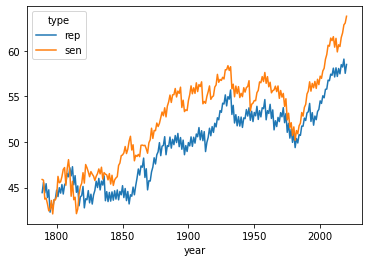

In [11]:
mean_inc_type['age_years'].unstack().plot()

In [8]:
mean_inc_type

age_days  age_years
year type                         
1789 rep   16222.690476  44.445727
     sen   16747.258065  45.882899
1790 rep   16630.511628  45.563046
     sen   16720.083333  45.808447
1791 rep   16213.250000  44.419863
...                 ...        ...
2020 sen   23281.010000  63.783589
2021 sen   23529.538462  64.464489
2022 sen   23894.538462  65.464489
2023 sen   24507.606061  67.144126
2024 sen   24872.606061  68.144126

[468 rows x 2 columns]

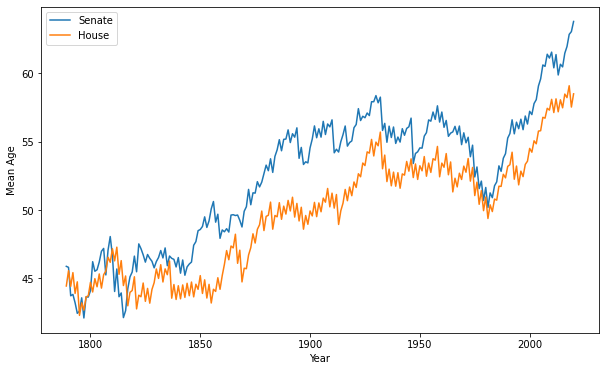

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
df_plot = mean_inc_type['age_years'].unstack()
ax.plot(df_plot['sen'])
ax.plot(df_plot['rep'])
ax.legend(['Senate', 'House'])
ax.set_xlabel('Year')
ax.set_ylabel('Mean Age')
plt.savefig('mean_age.png')
plt.show()

In [ ]:
mean_yr['age_years'].plot()

In [ ]:
drop_data = pd.concat([df.groupby('year').size(), df_dropped.groupby('year').size()], axis=1)
drop_data = drop_data.fillna(0)
drop_data['percentage'] = drop_data[1] / drop_data[0]
drop_data.columns = ['total_records', 'missing_bday', 'percentage']
drop_data.sort_values('percentage', ascending=False)

In [ ]:
df_dropped.groupby('year').size()

In [ ]:
df[df['year'] == 1890]['age'].dt.days.astype(int)